<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 2)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set (Employee data)

The dataset contains information about employees. The aim is to find which employees might undergo attrition.<br> Attribute information: 

**Age:** Age of the employee 

**BusinessTravel:** How much travel is involved in the job for the employee:No Travel, Travel Frequently, Tavel Rarely

**Department:** Department of the employee: Human Resources, Reserach & Development, Sales

**Commute:** Number of miles of daily commute for the employee

**Education:** Employee education field: Human Resources, Life Sciences, Marketing, Medical Sciences, Technical, Others

**EnvironmentSatisfaction:** Satisfaction of employee with office environment

**Gender:** Employee gender

**JobInvolvement:** Job involvement rating

**JobLevel:**  Job level for employee designation

**JobSatisfaction:** Employee job satisfaction rating

**MonthlyIncome:** Employee monthly salary

**OverTime:** Has the employee been open to working overtime: Yes or No

**PercentSalaryHike:** Percent increase in salary

**PerformanceRating:** Overall employee performance rating

**YearsAtCompany:** Number of years the employee has worked with the company

**Attrition:** Employee leaving the company: Yes or No

## Table of Content

1. **[Decision tree](#dtree)**
2. **[Random forest](#rf)**

**Import the required libraries**

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as st

#### Load the csv file

In [2]:
df=pd.read_csv('emp_attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,YearsAtCompany
0,33,Yes,Travel_Frequently,Research & Development,3,Life Sciences,1,Male,3,1,Research Scientist,1,3348,1,Yes,11,3,10
1,32,Yes,Travel_Rarely,Sales,4,Medical,4,Male,1,3,Sales Executive,4,10400,1,No,11,3,14
2,40,Yes,Travel_Rarely,Research & Development,9,Life Sciences,4,Male,3,1,Laboratory Technician,1,2018,3,No,14,3,5
3,42,No,Travel_Rarely,Research & Development,7,Medical,2,Female,4,2,Research Scientist,2,2372,6,Yes,16,3,1
4,43,No,Travel_Frequently,Research & Development,27,Life Sciences,3,Female,3,3,Manufacturing Director,1,10820,8,No,11,3,8


In [3]:
df['Attrition'].value_counts()

No     880
Yes    700
Name: Attrition, dtype: int64

In [4]:
df['Attrition']=df['Attrition'].map({'Yes':1,'No':0})
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,YearsAtCompany
0,33,1,Travel_Frequently,Research & Development,3,Life Sciences,1,Male,3,1,Research Scientist,1,3348,1,Yes,11,3,10
1,32,1,Travel_Rarely,Sales,4,Medical,4,Male,1,3,Sales Executive,4,10400,1,No,11,3,14
2,40,1,Travel_Rarely,Research & Development,9,Life Sciences,4,Male,3,1,Laboratory Technician,1,2018,3,No,14,3,5
3,42,0,Travel_Rarely,Research & Development,7,Medical,2,Female,4,2,Research Scientist,2,2372,6,Yes,16,3,1
4,43,0,Travel_Frequently,Research & Development,27,Life Sciences,3,Female,3,3,Manufacturing Director,1,10820,8,No,11,3,8


In [5]:
df.shape

(1580, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1580 entries, 0 to 1579
Data columns (total 18 columns):
Age                        1580 non-null int64
Attrition                  1580 non-null int64
BusinessTravel             1580 non-null object
Department                 1580 non-null object
DistanceFromHome           1580 non-null int64
EducationField             1580 non-null object
EnvironmentSatisfaction    1580 non-null int64
Gender                     1580 non-null object
JobInvolvement             1580 non-null int64
JobLevel                   1580 non-null int64
JobRole                    1580 non-null object
JobSatisfaction            1580 non-null int64
MonthlyIncome              1580 non-null int64
NumCompaniesWorked         1580 non-null int64
OverTime                   1580 non-null object
PercentSalaryHike          1580 non-null int64
PerformanceRating          1580 non-null int64
YearsAtCompany             1580 non-null int64
dtypes: int64(12), object(6)
memory usage

In [7]:
df.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
EducationField             0
EnvironmentSatisfaction    0
Gender                     0
JobInvolvement             0
JobLevel                   0
JobRole                    0
JobSatisfaction            0
MonthlyIncome              0
NumCompaniesWorked         0
OverTime                   0
PercentSalaryHike          0
PerformanceRating          0
YearsAtCompany             0
dtype: int64

In [8]:
df['PerformanceRating'].value_counts()

3    1580
Name: PerformanceRating, dtype: int64

In [9]:
# performance rating has same values so dropping the variable
df=df.drop('PerformanceRating',axis=1)
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,YearsAtCompany
0,33,1,Travel_Frequently,Research & Development,3,Life Sciences,1,Male,3,1,Research Scientist,1,3348,1,Yes,11,10
1,32,1,Travel_Rarely,Sales,4,Medical,4,Male,1,3,Sales Executive,4,10400,1,No,11,14
2,40,1,Travel_Rarely,Research & Development,9,Life Sciences,4,Male,3,1,Laboratory Technician,1,2018,3,No,14,5
3,42,0,Travel_Rarely,Research & Development,7,Medical,2,Female,4,2,Research Scientist,2,2372,6,Yes,16,1
4,43,0,Travel_Frequently,Research & Development,27,Life Sciences,3,Female,3,3,Manufacturing Director,1,10820,8,No,11,8


### Let's begin with some hands-on practice exercises

<a id="dtree"> </a>
## 1. Decision tree

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Write a code to detect the outliers in the dataset. Remove the outliers using IQR method, if present.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

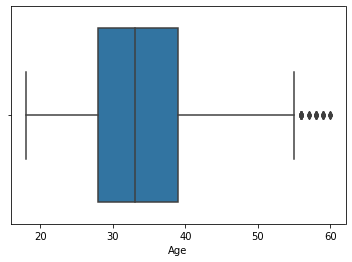

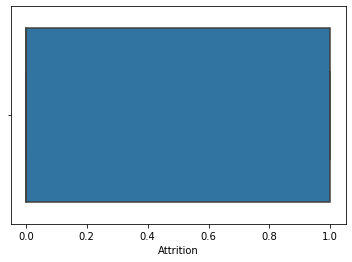

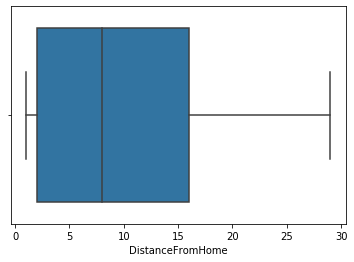

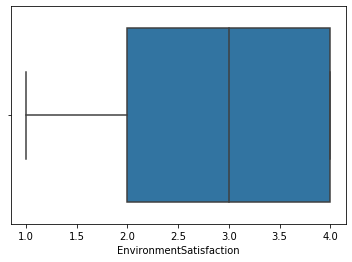

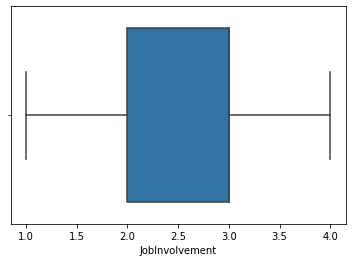

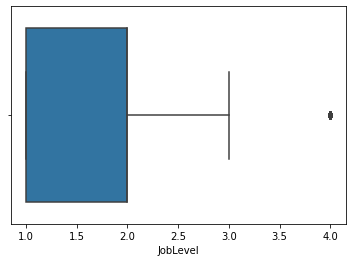

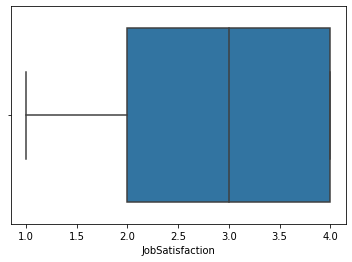

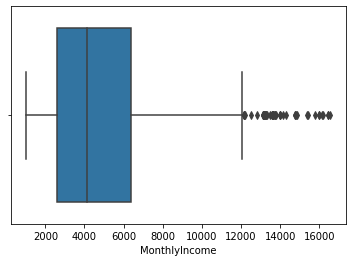

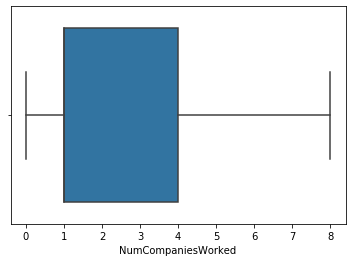

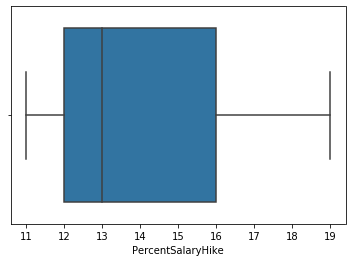

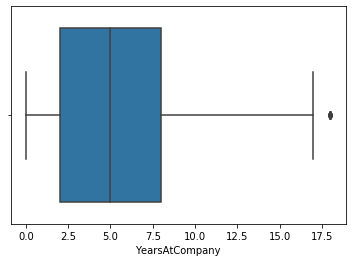

In [10]:
num_cols=df.select_dtypes(np.number)
for i in num_cols.columns:
    sns.boxplot(df[i])
    plt.show()

In [11]:
# few outliers are present in ['AGE','JOBLEVEL','MONTHLY INCOME','YEARSATCOMPANY']

In [13]:
#removing outliers
q1=df.quantile(0.25)
q3=df.quantile(0.75)

IQR=q3-q1
ul=q3+(1.5*IQR)
ll=q3-(1.5*IQR)

df=df[~((df<ll)|(df>ul))]
df=df.dropna()
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,YearsAtCompany
0,33.0,1,Travel_Frequently,Research & Development,3,Life Sciences,1,Male,3.0,1.0,Research Scientist,1,3348.0,1,Yes,11,10.0
2,40.0,1,Travel_Rarely,Research & Development,9,Life Sciences,4,Male,3.0,1.0,Laboratory Technician,1,2018.0,3,No,14,5.0
3,42.0,0,Travel_Rarely,Research & Development,7,Medical,2,Female,4.0,2.0,Research Scientist,2,2372.0,6,Yes,16,1.0
4,43.0,0,Travel_Frequently,Research & Development,27,Life Sciences,3,Female,3.0,3.0,Manufacturing Director,1,10820.0,8,No,11,8.0
5,35.0,0,Travel_Rarely,Human Resources,8,Technical Degree,3,Male,3.0,1.0,Human Resources,3,4323.0,1,No,17,5.0


In [15]:
df.shape

(1249, 17)

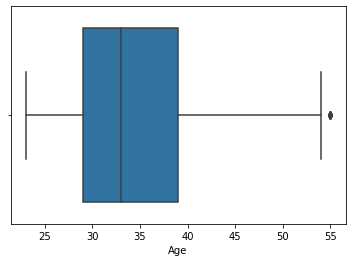

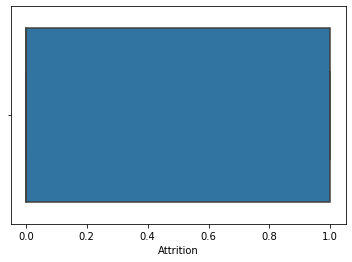

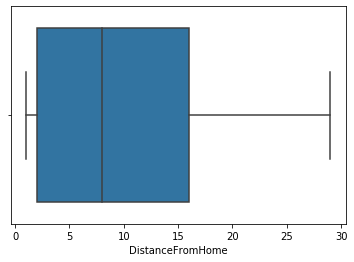

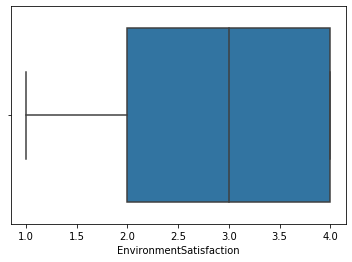

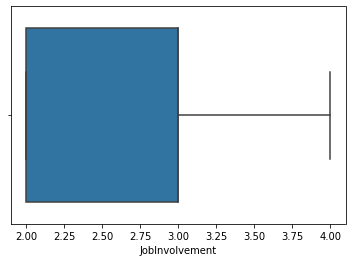

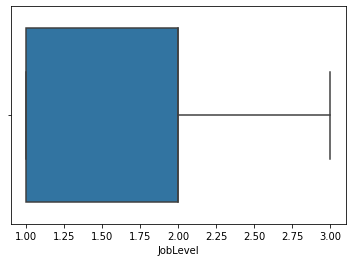

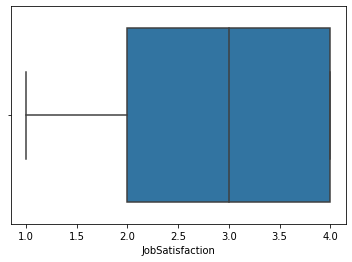

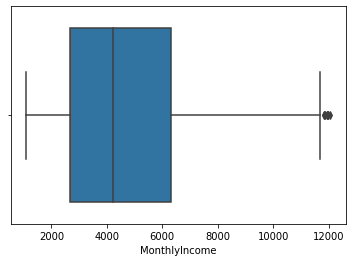

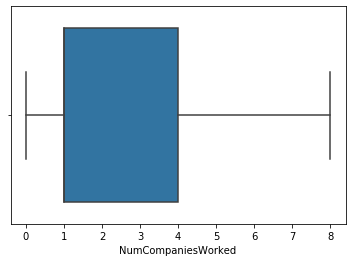

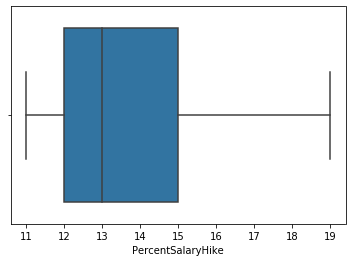

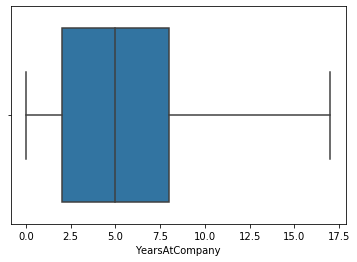

In [16]:
num_cols=df.select_dtypes(np.number)
for i in num_cols.columns:
    sns.boxplot(df[i])
    plt.show()

In [17]:
# outliers have been removed from the dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Build a model to predict whether or not an employee will leave the company based on employee's environment satisfaction and monthly income. Calculate the accuracy for the model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

y=df['Attrition']
x=df[['EnvironmentSatisfaction','MonthlyIncome']]

lor=LogisticRegression(solver='liblinear')
lor.fit(x,y)

y_pred=lor.predict(x)

accuracy_score(y,y_pred)

0.6060848678943155

In [19]:
y=df['Attrition']
x=df[['EnvironmentSatisfaction','MonthlyIncome']]

from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x,y)
y_pred=dt.predict(x)
y_prob=dt.predict_proba(x)[:,1]

accuracy_score(y,y_pred)



0.9975980784627703

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Build a full model to predict if an employee will leave the company. Find three features that impact the model prediction the most.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [20]:
df2=pd.get_dummies(df,drop_first=True)
df2.head()

,Age,Attrition,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,...,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,OverTime_Yes
0,33.0,1,3,1,3.0,1.0,1,3348.0,1,11,...,1,0,0,0,0,0,1,0,0,1
2,40.0,1,9,4,3.0,1.0,1,2018.0,3,14,...,1,0,1,0,0,0,0,0,0,0
3,42.0,0,7,2,4.0,2.0,2,2372.0,6,16,...,0,0,0,0,0,0,1,0,0,1
4,43.0,0,27,3,3.0,3.0,1,10820.0,8,11,...,0,0,0,0,1,0,0,0,0,0
5,35.0,0,8,3,3.0,1.0,3,4323.0,1,17,...,1,1,0,0,0,0,0,0,0,0


In [25]:
y=df2['Attrition']
x=df2.drop('Attrition',axis=1)

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=42)
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

dt.fit(x_train,y_train)
a=pd.DataFrame(dt.feature_importances_,index=x_train.columns,columns=['values']).sort_values(by='values',ascending=False)

print("The 3 most important features that impact the prediction most : \n ",a.head(3).index)

The 3 most important features that impact the prediction most : 
  Index(['MonthlyIncome', 'Age', 'NumCompaniesWorked'], dtype='object')


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4.  Find the area under the receiver operating characteristic curve for full model built in question 3. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [28]:
from sklearn.metrics import roc_auc_score
y_pred=dt.predict(x_test)
y_prob=dt.predict_proba(x_test)[:,1]
print("Area under the roc curve is: ",roc_auc_score(y_test,y_prob))

Area under the roc curve is:  0.9033276914707127


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Plot a confusion matrix for the full model built in Q3.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [30]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[206,  27],
       [ 11, 131]], dtype=int64)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Calculate the specificity, sensitivity, % of misclassified and correctly classified observations. What can you say about the model by looking at the sensitivity and specificity values? Is this a good model?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [32]:
TN=cm[0,0]
TP=cm[1,1]
FP=cm[0,1]
FN=cm[1,0]

specificity=TN/(TN+FP)
sensitivity=TP/(FN+TP)
misclassification_Rate=(FP+FN)/(TN+TP+FN+FP)
accuracy=(TP+TN)/(TN+TP+FN+FP)

print("specificity : ",specificity)
print("sensitivity : ",sensitivity)
print("misclassification_rate : ",misclassification_Rate)
print("correctly classified observations or accuracy is : ",accuracy)

specificity :  0.8841201716738197
sensitivity :  0.9225352112676056
misclassification_rate :  0.10133333333333333
correctly classified observations or accuracy is :  0.8986666666666666


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Build and plot a decision tree with maximum 5 terminal nodes.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [33]:
y=df2['Attrition']
x=df2.drop('Attrition',axis=1)

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=42)

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_leaf_nodes=5)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=5)

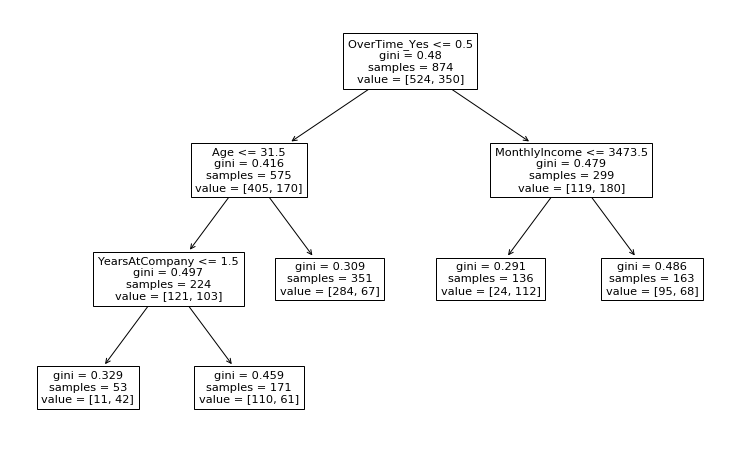

In [34]:
from sklearn import tree
from sklearn.tree import plot_tree
plt.figure(figsize=(13,8))
a=plot_tree(dtc,feature_names=x.columns)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Build a Decision Tree model with the predefined parameters and find the average accuracy by performing the 10 fold cross validation.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [38]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,KFold
from scipy.stats import randint as sp_randint

y=df2['Attrition']
x=df2.drop('Attrition',axis=1)

dt=DecisionTreeClassifier()
kfold=KFold(n_splits=10)

param={'max_depth':sp_randint(1,20),
      'min_samples_leaf':sp_randint(1,25),
      'min_samples_split':sp_randint(1,30),
      'criterion':['gini','entropy']}

rsearch=RandomizedSearchCV(dt,param_distributions=param,cv=kfold,scoring='roc_auc',n_iter=50)
rsearch.fit(x,y)

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=DecisionTreeClassifier(), n_iter=50,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021634785F88>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021634E95588>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021634E98608>},
                   scoring='roc_auc')

In [39]:
rsearch.best_params_

{'criterion': 'entropy',
 'max_depth': 14,
 'min_samples_leaf': 2,
 'min_samples_split': 10}

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=42)
dt=DecisionTreeClassifier(**rsearch.best_params_,random_state=4)
dt.fit(x_train,y_train)

y_pred=dt.predict(x_test)

print("the average accuracy is : ",accuracy_score(y_test,y_pred))

the average accuracy is :  0.84


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. For a decision tree model, find the best value of hyperparameters "criterion", "max_depth", and "min_samples_split".</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Consider the values as:
        
     criterion = ['entropy', 'gini'],
     max_depth = range(2, 10),
     min_samples_split = range(2,10)

In [45]:
y=df2['Attrition']
x=df2.drop('Attrition',axis=1)

dt=DecisionTreeClassifier()
params={'max_depth':range(2,10),
       'min_samples_split':range(2,10),
       'criterion':['gini','entropy']}

gsearch=GridSearchCV(dt,param_grid=params,cv=3,scoring='roc_auc')
gsearch.fit(x,y)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10),
                         'min_samples_split': range(2, 10)},
             scoring='roc_auc')

In [46]:
print("the best value of hyperparameters are : ")
gsearch.best_params_

the best value of hyperparameters are : 


{'criterion': 'gini', 'max_depth': 9, 'min_samples_split': 9}

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>10. Build a decision tree model using the tuned hyperparameters, perform 10 fold cross validation and get the average ROC-AUC score.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [49]:
from sklearn.model_selection import RandomizedSearchCV,KFold
from scipy.stats import randint as sp_randint
y=df2['Attrition']
x=df2.drop('Attrition',axis=1)

dt=DecisionTreeClassifier()
kfold=KFold(n_splits=10)

params={'max_depth':sp_randint(1,10),
       'min_samples_leaf':sp_randint(1,25),
       'min_samples_split':sp_randint(1,30),
       'criterion':['gini','entropy']}
rsearch=RandomizedSearchCV(dt,param_distributions=params,cv=kfold,scoring='roc_auc',n_iter=50,n_jobs=-1)
rsearch.fit(x,y)

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=DecisionTreeClassifier(), n_iter=50, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002163522CD48>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002163535B108>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002163535B388>},
                   scoring='roc_auc')

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=3)

dt=DecisionTreeClassifier(**rsearch.best_params_,random_state=4)
dt.fit(x_train,y_train)

y_pred=dt.predict(x_test)
print("roc_auc_score is : ",roc_auc_score(y_test,y_pred))

roc_auc_score is :  0.8362818590704647


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Build 5 decision trees each with 20 random features. Also predict the attrition for test set for each model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [52]:
from sklearn.ensemble import RandomForestClassifier
y=df2['Attrition']
x=df2.drop('Attrition',axis=1)
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=3) 

rfc = RandomForestClassifier(max_features=20,n_estimators=5)
rfc.fit(x_train,y_train)

y_pred = rfc.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Create a new dataframe "model_predictions_df" by appending each prediction made in question 8. There will be 5 columns in the dataframe for each prediction using the decision tree models built in above question.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [1]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Create a new column "Voted_Result" in the dataframe "model_predictions_df" that contains the maximum occuring value (mode) of the 5 columns in the dataframe (row-wise).<br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [1]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Consider the values of "Voted_Result" as our new predictions and store its values in a variable "new_y_pred" and find the accuracy and the roc-auc score using new_y_pred.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [1]:
# type your code here

<a id="rf"> </a>
## 2. Random Forest

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Build a random forest full model to predict if an employee will leave the company or not and generate a classification report.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [54]:
from sklearn.metrics import classification_report

In [55]:
from sklearn.ensemble import RandomForestClassifier
y=df2['Attrition']
x=df2.drop('Attrition',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=4)

rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

y_pred=rfc.predict(x_test)
y_prob=rfc.predict_proba(x_test)[:,1]

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       228
           1       0.95      0.97      0.96       147

    accuracy                           0.97       375
   macro avg       0.97      0.97      0.97       375
weighted avg       0.97      0.97      0.97       375



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. For a random forest model, find the best value of hyperparameters "n_estimators", "criterion", "max_depth", and "min_samples_split".</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Given list of values:

    criterion = ['entropy', 'gini'],
    n_estimators = [90, 100, 150, 200],
    max_depth = [10, 15, 20],
    min_samples_split = [2, 5, 8]

In [56]:
y=df2['Attrition']
x=df2.drop('Attrition',axis=1)

rfc=RandomForestClassifier()
param=dict(criterion = ['entropy', 'gini'],
n_estimators = [90, 100, 150, 200],
max_depth = [10, 15, 20],
min_samples_split = [2, 5, 8])
gsearch=GridSearchCV(rfc,param_grid=param,cv=3,scoring='roc_auc')
gsearch.fit(x,y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [10, 15, 20],
                         'min_samples_split': [2, 5, 8],
                         'n_estimators': [90, 100, 150, 200]},
             scoring='roc_auc')

In [57]:
print("The best hyperparameters are : ")
gsearch.best_params_

The best hyperparameters are : 


{'criterion': 'entropy',
 'max_depth': 20,
 'min_samples_split': 2,
 'n_estimators': 200}

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Build a random forest model using the tuned hyperparameters, perform 10 fold cross validation and get the average ROC-AUC score.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [62]:
from sklearn.model_selection import KFold,RandomizedSearchCV
from scipy.stats import randint as sp_randint

y=df2['Attrition']
x=df2.drop('Attrition',axis=1)

rfc=RandomForestClassifier()
kfold=KFold(n_splits=10)

param={'max_depth':sp_randint(1,20),
      'min_samples_leaf':sp_randint(1,15),
      'max_features':sp_randint(2,16),
      'n_estimators':sp_randint(1,25),
      'min_samples_split':sp_randint(1,3),
      'criterion':['gini','entropy']}

rsearch=RandomizedSearchCV(rfc,param_distributions=param,cv=kfold,scoring='roc_auc',n_iter=20,n_jobs=-1)
rsearch.fit(x,y)

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(), n_iter=20, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021636D39188>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021636DD0AC8>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021636DD05C8>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021636DD0DC8>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021636DD0CC8>},
                   scoring='roc_auc')

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=3)
rfc=RandomForestClassifier(**rsearch.best_params_,random_state=4)
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
y_prob=rfc.predict_proba(x_test)

print("The average roc_auc_Score of the model is : ", roc_auc_score(y_test,y_pred))

The average roc_auc_Score of the model is :  0.9367316341829086


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Using the tuned random forest model, find the features that impact the model prediction the most.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [64]:
imp=pd.DataFrame(rfc.feature_importances_,index=x.columns,columns=['important']).sort_values(by='important',ascending=False)
imp

,important
MonthlyIncome,0.166762
Age,0.127604
DistanceFromHome,0.108238
YearsAtCompany,0.087321
PercentSalaryHike,0.074684
JobSatisfaction,0.062202
OverTime_Yes,0.058194
EnvironmentSatisfaction,0.050557
NumCompaniesWorked,0.043266
JobLevel,0.025132


In [65]:
# monthlyincome age and distance from home are the variables which affected the model most

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Build a random forest model using the top 10 most important features.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [66]:
imp.head(10).index

Index(['MonthlyIncome', 'Age', 'DistanceFromHome', 'YearsAtCompany',
       'PercentSalaryHike', 'JobSatisfaction', 'OverTime_Yes',
       'EnvironmentSatisfaction', 'NumCompaniesWorked', 'JobLevel'],
      dtype='object')

In [68]:
y=df2['Attrition']
x=df2[['MonthlyIncome', 'Age', 'DistanceFromHome', 'YearsAtCompany',
       'PercentSalaryHike', 'JobSatisfaction', 'OverTime_Yes',
       'EnvironmentSatisfaction', 'NumCompaniesWorked', 'JobLevel']]

from sklearn.ensemble import RandomForestClassifier
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=3)
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

y_pred=rfc.predict(x_test)
y_prob=rfc.predict_proba(x_test)

print("The roc_auc score is : ",roc_auc_score(y_test,y_pred))

The roc_auc score is :  0.963568215892054


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Plot a confusion matrix and area under the receiver operating characteristic curve for the model built in question 19. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

confusion_matrix :  [[219  11]
 [  3 142]]
roc_auc_score :  0.9657421289355322


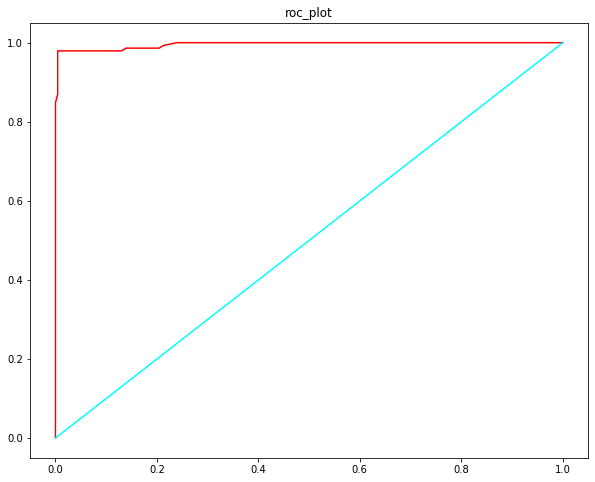

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve

rfc=RandomForestClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=3)
y=df2['Attrition']
x=df2[['MonthlyIncome', 'Age', 'DistanceFromHome', 'YearsAtCompany',
       'PercentSalaryHike', 'JobSatisfaction', 'OverTime_Yes',
       'EnvironmentSatisfaction', 'NumCompaniesWorked', 'JobLevel']]

rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
y_prob=rfc.predict_proba(x_test)[:,1]

print("confusion_matrix : ",confusion_matrix(y_test,y_pred))
print("roc_auc_score : ",roc_auc_score(y_test,y_pred))

plt.figure(figsize=(10,8))
fpr,tpr,thresholds=roc_curve(y_test,y_prob)
plt.plot(fpr,tpr,'r')
plt.plot(fpr,fpr,'cyan')
plt.title('roc_plot')
plt.show()